In [1]:
#Importing required librabries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Loading and gathering the basic informationof dataset.

In [2]:
df = pd.read_csv('ratings_Beauty.csv')
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


The dataset has 4 columns UserID, ProductId, Rating and Timestamp

In [3]:
print("Shape: ", df.shape)
print("Column names: ", df.columns)

Shape:  (2023070, 4)
Column names:  Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')


In [34]:
df.isnull().any()

UserId       False
ProductId    False
Rating       False
Timestamp    False
dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
UserId       object
ProductId    object
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [36]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [37]:
print("Unique UserID count: ", df.UserId.nunique())
print("Unique ProductID count: ", df.ProductId.nunique())

Unique UserID count:  1210271
Unique ProductID count:  249274


#  Data Visualization

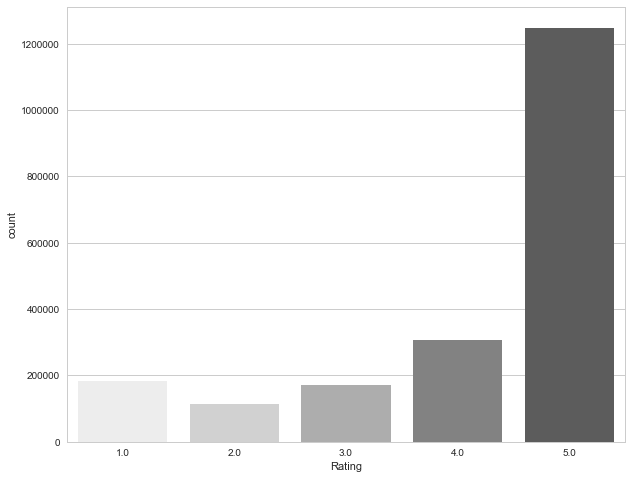

In [5]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style('whitegrid')
sns.countplot(x='Rating', data=df, palette=sns.color_palette('Greys'))

Timestamp will not give much relevant intel in data-analysis. Hence can be avoided. All other columns are non-null.

In [6]:
#Grouping the mean of ratings by ID.
product_rating_mean = df.groupby('ProductId')['Rating'].mean()
product_rating_mean.head()

ProductId
0205616461    5.0
0558925278    4.0
0733001998    4.0
0737104473    1.0
0762451459    5.0
Name: Rating, dtype: float64

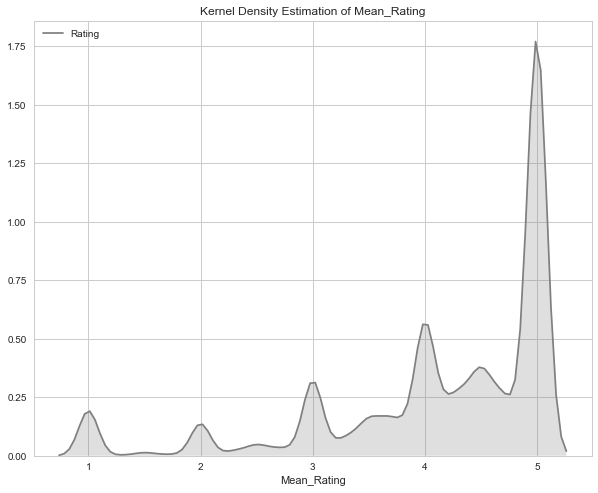

In [7]:
sns_plot1 = sns.kdeplot(product_rating_mean, shade=True, color='grey')
sns_plot1.set(xlabel='Mean_Rating', title='Kernel Density Estimation of Mean_Rating')
sns_plot1.figure.savefig("output1.png")

In [8]:
#Grouping the count of ratings by ID.
product_rating_count = df.groupby('ProductId')['Rating'].count()
product_rating_count.head()

ProductId
0205616461    1
0558925278    2
0733001998    1
0737104473    1
0762451459    1
Name: Rating, dtype: int64

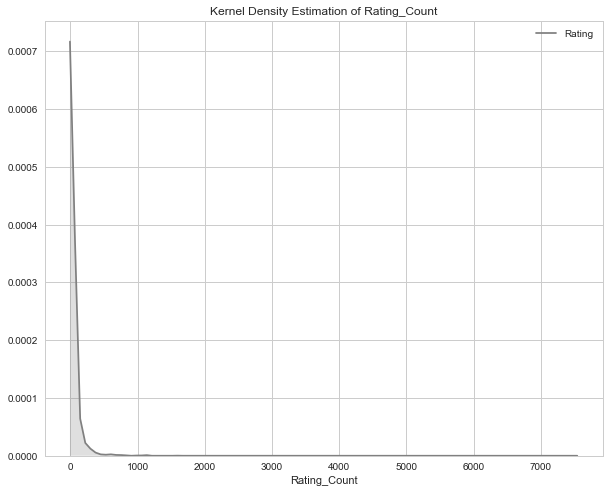

In [9]:
sns_plot2 = sns.kdeplot(product_rating_count, shade=True, color='grey')
sns_plot2.set(xlabel='Rating_Count', title='Kernel Density Estimation of Rating_Count')
sns_plot2.figure.savefig("output2.png")

# Transforming Data

In [10]:
# Extracting unique id
unique_products_list = df.ProductId.unique()

data_model = pd.DataFrame({'MeanRating': product_rating_mean[unique_products_list],
                           'Count': product_rating_count[unique_products_list]})
data_model.head()

,Count,MeanRating
ProductId,,
0205616461,1,5.0
0558925278,2,4.0
0733001998,1,4.0
0737104473,1,1.0
0762451459,1,5.0


We got a datamodel with unique productIds and corresponding MeanRating and Count of ratings.

In [11]:
#Normalizing the Data
def normalize(values):
    mn = values.min()
    mx = values.max()
    return(10.0/(mx - mn) * (values - mx)+10)

In [12]:
norm_data_model = normalize(data_model)
norm_data_model.head()

,Count,MeanRating
ProductId,,
0205616461,0.000000,10.0
0558925278,0.001328,7.5
0733001998,0.000000,7.5
0737104473,0.000000,0.0
0762451459,0.000000,10.0


# KNeighbors Classifier

In [13]:
#import sklearn 
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Training Datapoints
datapoints = norm_data_model[['MeanRating','Count']].values
# Training Lables
labels = norm_data_model.index.values

# Classifier
engine = KNeighborsClassifier(n_neighbors=20)
# Fiting the Traindata
engine.fit(datapoints,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [16]:
labels

array(['0205616461', '0558925278', '0733001998', ..., 'B00LP2YB8E',
       'B00LPVG6V0', 'B00LU0LTOU'], dtype=object)

# Prediction using model

In [42]:
product_id = '130414089X'

prod = norm_data_model.loc[product_id][['MeanRating','Count']].values
prods = prod.reshape(1,-1)
recommended_prods = engine.kneighbors(X=prods,n_neighbors=20,return_distance=False)

prod_list = []
for each in recommended_prods:
    prod_list.append(norm_data_model.iloc[each].index)
    
print("Recommended products: ")
print(prod_list)

Recommended products: 
[Index(['B003VUTZLQ', 'B006DO54KI', 'B00103MB30', 'B00103MD42', 'B003O4F0LS',
       'B0066901OO', 'B006DN299I', 'B006DNE9IM', 'B0006OCD46', 'B001LBTZ1W',
       'B0046MKILO', 'B001AMRIB6', 'B00LPVG6V0', 'B00LU0LTOU', 'B001KNBYJC',
       'B003HLF1TO', 'B003HLSZYM', 'B006GWNDGO', 'B006K2DDPG', 'B006EN93XW'],
      dtype='object', name='ProductId')]


In [43]:
product_id = 'B001AMRIB6'

prod = norm_data_model.loc[product_id][['MeanRating','Count']].values
prods = prod.reshape(1,-1)
recommended_prods = engine.kneighbors(X=prods,n_neighbors=20,return_distance=False)

prod_list = []
for each in recommended_prods:
    prod_list.append(norm_data_model.iloc[each].index)
    
print("Recommended products: ")
print(prod_list)

Recommended products: 
[Index(['B003VUTZLQ', 'B006DO54KI', 'B00103MB30', 'B00103MD42', 'B003O4F0LS',
       'B0066901OO', 'B006DN299I', 'B006DNE9IM', 'B0006OCD46', 'B001LBTZ1W',
       'B0046MKILO', 'B001AMRIB6', 'B00LPVG6V0', 'B00LU0LTOU', 'B001KNBYJC',
       'B003HLF1TO', 'B003HLSZYM', 'B006GWNDGO', 'B006K2DDPG', 'B006EN93XW'],
      dtype='object', name='ProductId')]
